# Practica de laboratorio: Lineas equipotenciales
###### Gabriel Missael Barco, 29/02/2020

Se realizó el experimento de colocar dos electrodos con una diferencia de potencial de 5v aproximadamente, dentro de una solución de agua con sal, y despues se midio dicha diferencia de potencial en 12 o 20 puntos diferentes (dependiendo el caso) entre ambos electrodos. Se realizó esto en 5 casos totales, en cada uno de los caso la geometria de los electrodos era distinta.
En este notebook lo que hacemos es interpolar con polinomios cubicos los 12 o 20 puntos de cada caso, para intentar visualizar el campo generado entre ambos electrodos. Se usa una funcion diferente para los puntos internos que para los externos a los puntos medidos

In [5]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import interpolate

In [6]:
#Hago el grid de puntos donde se tomaron medidas
x = np.zeros((20, 2))
for i in range(4):
    for j in range(3):
        x[i*3+j][0] = 10*(i+1)
        x[i*3+j][1] = 10*(j+1)    
for i in range(4):
    x[12+i][0] = 10*(i+1)
    x[12+i][1] = 40
    x[16+i][0] = 10*(i+1)
    x[16+i][1] = 0

#Capturo datos medidos para el voltaje en cada punto en cada caso

caso = np.zeros((20, 5))

caso[0:12, 0] = [2.4, 2.19, 2.33, 3.15, 3.8, 3.13, 3.92, 4.03, 3.9, 4.75, 5.15, 4.94]
caso[0:12, 1] = [2.7, 1.52, 2.3, 2.95, 2.91, 3.01, 3.78, 3.84, 3.84, 4.68, 4.85, 4.69]
caso[0:12, 2] = [2.48, 2.34, 2.45, 3.17, 3.09, 3.13, 3.8, 3.83, 3.83, 4.51, 4.59, 4.49]
caso[0:20, 3] = [1.86, 0.0, 1.77, 2.72, 2.55, 2.71, 3.81, 3.83, 3.79, 4.86, 5.03, 4.84,
                2.07, 2.78, 3.68, 4.66, 2.14, 2.84, 3.72, 4.59]
caso[0:20, 4] = [1.7, 0.0, 1.6, 2.36, 2.24, 2.32, 3.05, 3.09, 3.07, 3.87, 4.06, 3.83,
                1.83, 2.33, 3.01, 3.59, 1.88, 2.39, 3.06, 3.66]

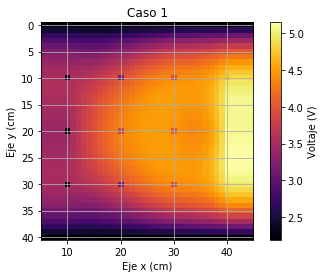

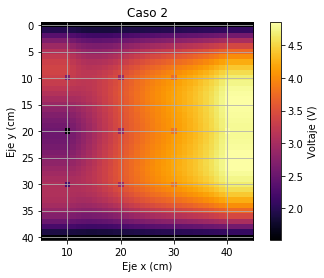

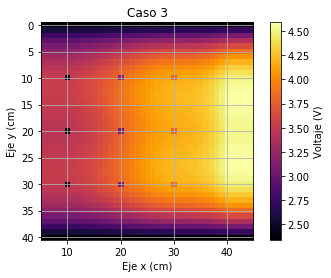

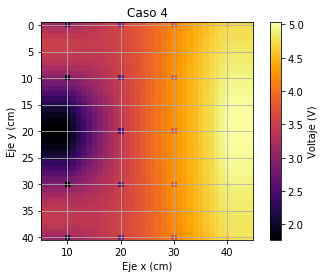

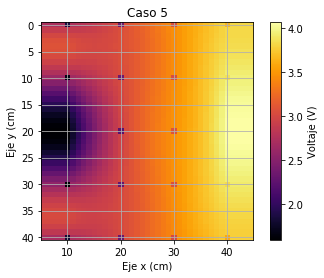

In [17]:
for pos in range(5):
    #Grafico el caso "pos"

    #Genero matriz de puntos, todos son nan, excepto los medidos
    mat = np.zeros((41,51))
    mat.fill(np.nan)
    count = 0
    for i in x:
        if caso[count][pos] != 0:
            mat[int(i[1])][int(i[0])] = caso[count][pos]
        count += 1

    #Genero 41*51 puntos y obtengo un valor estimado del voltaje para cada uno con una interpolacion
    mat_points = np.zeros((41*51, 2))
    for i in range(51):
        for j in range(41):
            mat_points[i*41+j][0] = i
            mat_points[i*41+j][1] = j

    interpolation = griddata(x, caso[:,pos], mat_points, method='cubic')
    f = interpolate.interp2d(x[:,0], x[:,1], caso[:,pos], kind='cubic')

    #Paso los puntos interpolados a una matriz 
    mat_inter = np.zeros((51,41))
    count = 0
    for i in interpolation:
        if i is not float:
            i = f(int(mat_points[count][0]), int(mat_points[count][1]))
        mat_inter[int(mat_points[count][0])][int(mat_points[count][1])] = i
        count += 1

    #Graficamos los datos interpolados (mat_inter) y los datos medidos (mat)
    plt.imshow(mat_inter.T, cmap = "inferno")
    plt.imshow(mat, cmap = "inferno")
    cbar = plt.colorbar()
    cbar.set_label("Voltaje (V)")
    plt.grid()
    plt.xlim(5,45)
    plt.xlabel("Eje x (cm)")
    plt.ylabel("Eje y (cm)")
    plt.title("Caso "+str(pos+1))
    plt.savefig("campos/Caso"+str(pos+1)+".png")
    plt.show()
    